In [1]:
DEBUG = True

Get the STG of the model, and its transition matrix.

In [2]:
import numpy as np

from pyboolnet.external.bnet2primes import bnet_text2primes
from pyboolnet.state_transition_graphs import primes2stg

from transition_matrix import get_transition_matrix

bnet = """
A, A | B & C
B, B & !C
C, B & !C | !C & !D | !B & C & D
D, !A & !B & !C & !D | !A & C & D
"""

primes = bnet_text2primes(bnet)
primes = {key: primes[key] for key in sorted(primes)}
update = "asynchronous"
# update = "synchronous"
stg = primes2stg(primes, update)

T = get_transition_matrix(stg, DEBUG=DEBUG)

np.set_printoptions(linewidth=1000, precision=3, suppress=True)

print("T")
print(np.round(T, 3))

from matrix_operations import npower

T_inf = npower(T, 1000)

print("T_inf")
print(np.round(T_inf, 3))

T
[[0.5  0.25 0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.25 0.75 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.25 0.   0.75 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.75 0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.5  0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.25 0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.25 0.   0.25 0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.25]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.75 0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.75 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.75 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.75 0.   0.   0.   0.  ]
 [

## SD grouping

In [3]:
from matrix_operations import compress_matrix
from matrix_operations import expand_matrix
from grouping import sd_grouping

sd_indexes = sd_grouping(bnet)

print(sd_indexes)

Tm = compress_matrix(T, sd_indexes)

print("Tm")
print(np.round(Tm, 3))

Tm_prime = expand_matrix(Tm, sd_indexes)

print("Tm_prime")
print(np.round(Tm_prime, 3))

Tm_inf = npower(Tm, 1000)

print("Tm_inf")
print(np.round(Tm_inf, 3))

Tm_inf_prime = expand_matrix(Tm_inf, sd_indexes)

print("Tm_inf_prime")
print(np.round(Tm_inf_prime, 3))

[[4, 5, 6, 7, 13, 15], [9, 11], [0, 1, 2], [3], [12, 14], [8, 10]]
Tm
[[0.75  0.042 0.042 0.042 0.125 0.   ]
 [0.    0.75  0.    0.    0.    0.25 ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.    0.875 0.125]
 [0.    0.    0.    0.    0.    1.   ]]
Tm_prime
[[0.333 0.333 0.333 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.333 0.333 0.333 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.333 0.333 0.333 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.014 0.014 0.014 0.042 0.125 0.125 0.125 0.125 0.    0.021 0.    0.021 0.062 0.125 0.062 0.125]
 [0.014 0.014 0.014 0.042 0.125 0.125 0.125 0.125 0.    0.021 0.    0.021 0.062 0.125 0.062 0.125]
 [0.014 0.014 0.014 0.042 0.125 0.125 0.125 0.125 0.    0.021 0.    0.021 0.062 0.125 0.062 

domRec ignored: No domain atoms found.
domRec ignored: No domain atoms found.


## References

Null Grouping

In [4]:
from grouping import null_grouping

null_indexes = null_grouping(bnet)

print(null_indexes)

T0 = compress_matrix(T, null_indexes)

print("T0")
print(np.round(T0, 3))

T0_prime = expand_matrix(T0, null_indexes)

print("T0_prime")
print(np.round(T0_prime, 3))

T0_inf = npower(T0, 1000)

print("T0_inf")
print(np.round(T0_inf, 3))

T0_inf_prime = expand_matrix(T0_inf, null_indexes)

print("T0_inf_prime")
print(np.round(T0_inf_prime, 3))

[[0, 1, 2, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15], [3], [8, 10]]
T0
[[0.923 0.019 0.058]
 [0.    1.    0.   ]
 [0.    0.    1.   ]]
T0_prime
[[0.071 0.071 0.071 0.019 0.071 0.071 0.071 0.071 0.029 0.071 0.029 0.071 0.071 0.071 0.071 0.071]
 [0.071 0.071 0.071 0.019 0.071 0.071 0.071 0.071 0.029 0.071 0.029 0.071 0.071 0.071 0.071 0.071]
 [0.071 0.071 0.071 0.019 0.071 0.071 0.071 0.071 0.029 0.071 0.029 0.071 0.071 0.071 0.071 0.071]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.071 0.071 0.071 0.019 0.071 0.071 0.071 0.071 0.029 0.071 0.029 0.071 0.071 0.071 0.071 0.071]
 [0.071 0.071 0.071 0.019 0.071 0.071 0.071 0.071 0.029 0.071 0.029 0.071 0.071 0.071 0.071 0.071]
 [0.071 0.071 0.071 0.019 0.071 0.071 0.071 0.071 0.029 0.071 0.029 0.071 0.071 0.071 0.071 0.071]
 [0.071 0.071 0.071 0.019 0.071 0.071 0.071 0.071 0.029 0.071 0.029 0.071 0.071 0.071 0.071 0.071]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.5   0.    0.5   0. 

domRec ignored: No domain atoms found.
domRec ignored: No domain atoms found.


Random Grouping

In [5]:
from grouping import random_grouping

random_indexes = random_grouping(sd_indexes, null_indexes)

print(random_indexes)

Tr = compress_matrix(T, random_indexes)

print("Tr")
print(np.round(Tr, 3))

Tr_prime = expand_matrix(Tr, random_indexes)

print("Tr_prime")
print(np.round(Tr_prime, 3))

Tr_inf = npower(Tr, 1000)

print("Tr_inf")
print(np.round(Tr_inf, 3))

Tr_inf_prime = expand_matrix(Tr_inf, random_indexes)

print("Tr_inf_prime")
print(np.round(Tr_inf_prime, 3))

[[0, 1, 5, 6, 9], [2], [4, 7, 11, 14], [12, 13, 15], [3], [8, 10]]
Tr
[[0.65  0.1   0.2   0.    0.    0.05 ]
 [0.25  0.75  0.    0.    0.    0.   ]
 [0.125 0.    0.562 0.125 0.062 0.125]
 [0.    0.    0.25  0.75  0.    0.   ]
 [0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.    1.   ]]
Tr_prime
[[0.13  0.13  0.1   0.    0.05  0.13  0.13  0.05  0.025 0.13  0.025 0.05  0.    0.    0.05  0.   ]
 [0.13  0.13  0.1   0.    0.05  0.13  0.13  0.05  0.025 0.13  0.025 0.05  0.    0.    0.05  0.   ]
 [0.05  0.05  0.75  0.    0.    0.05  0.05  0.    0.    0.05  0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.025 0.025 0.    0.062 0.141 0.025 0.025 0.141 0.062 0.025 0.062 0.141 0.042 0.042 0.141 0.042]
 [0.13  0.13  0.1   0.    0.05  0.13  0.13  0.05  0.025 0.13  0.025 0.05  0.    0.    0.05  0.   ]
 [0.13  0.13  0.1   0.    0.05  0.13  0.13  0.05  0.025 0.13  0.025 0.05  0.    0.    0.05  

Get other reference matrices

In [6]:
from transition_matrix import get_identity_matrix
from transition_matrix import get_uniform_matrix

N = len(T)

I = get_identity_matrix(N)
U = get_uniform_matrix(N)

print(I)
print(U)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062]
 [0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.06

## Get rmsd and Dkl

In [7]:
from matrix_operations import get_rms_diff, get_dkl

# Data identifiers
identifiers = [
    (T, Tm_prime, T0_prime, Tr_prime, I, U),
    (T_inf, Tm_inf_prime, T0_inf_prime, Tr_inf_prime, I, U)  # Replace with actual data for T_inf, etc.
]

# Data names
identifier_names = [
    ("T", "Tm", "T0", "Tr", "I", "U"),
    ("T_inf", "Tm_inf", "T0_inf", "Tr_inf", "I", "U")  # Replace with actual data for T_inf, etc.
]

# List of methods to compute for each data pair
methods = [
    ("rmsd", get_rms_diff),
    ("Dkl", get_dkl)
]

# Function to generate data row
def generate_data_row(metric, identifiers_set, metric_fn):
    return [metric] + [metric_fn(identifiers_set[0], identifiers_set[i]) for i in range(1, len(identifiers_set))]

# Function to print data neatly
def print_data(headers, data):
    for header_row, data_row in zip(headers, data):
        print(" ".join([f"{header:<10}" for header in header_row]))
        for row in data_row:
            print(f"{row[0]:<10} " + " ".join([f"{val:<10.3f}" for val in row[1:]]))
        print()

# Generate data
data = []
headers = []

for identifiers_set, name_set in zip(identifiers, identifier_names):
    headers.append(name_set)
    
    data_row = []
    for metric, metric_fn in methods:
        data_row.append(generate_data_row(metric, identifiers_set, metric_fn))
    
    data.append(data_row)

# Print the data with headers
print_data(headers, data)

T          Tm         T0         Tr         I          U         
rmsd       0.112      0.145      0.127      0.136      0.168     
Dkl        10.785     23.957     16.360     inf        31.545    

T_inf      Tm_inf     T0_inf     Tr_inf     I          U         
rmsd       0.041      0.109      0.113      0.257      0.152     
Dkl        1.846      358.414    343.396    inf        29.237    



/home/kyuhyongpark/SDMarkov/sdmarkov/matrix_operations.py:317: RuntimeWarning: divide by zero encountered in divide
  ratio = np.divide(A,B, out=np.zeros_like(A, dtype=float), where=A!=0.0)


Get a distribution for random groupings

In [8]:
num_runs = 10000

rmsd = []
dkl = []

rmsd_inf = []
dkl_inf = []

for i in range (num_runs):

    random_indexes = random_grouping(sd_indexes, null_indexes, seed=i)

    TRm = compress_matrix(T, random_indexes)

    TRm_prime = expand_matrix(TRm, random_indexes)

    TRm_inf = npower(TRm, 100)

    TRm_inf_prime = expand_matrix(TRm_inf, random_indexes)
    
    rmsd.append(get_rms_diff(T, TRm_prime))
    dkl.append(get_dkl(T, TRm_prime))

    rmsd_inf.append(get_rms_diff(T_inf, TRm_inf_prime))
    dkl_inf.append(get_dkl(T_inf, TRm_inf_prime))

print("average rmsd of T and TRm_prime:", np.mean(rmsd))
print("average dkl of T and TRm_prime:", np.mean(dkl))

print("average rmsd of T_inf and TRm_inf_prime:", np.mean(rmsd_inf))
print("average dkl of T_inf and TRm_inf_prime:", np.mean(dkl_inf))

average rmsd of T and TRm_prime: 0.13071542345205986
average dkl of T and TRm_prime: 17.32884931831026
average rmsd of T_inf and TRm_inf_prime: 0.1071599180693422
average dkl of T_inf and TRm_inf_prime: 38.74832656277156


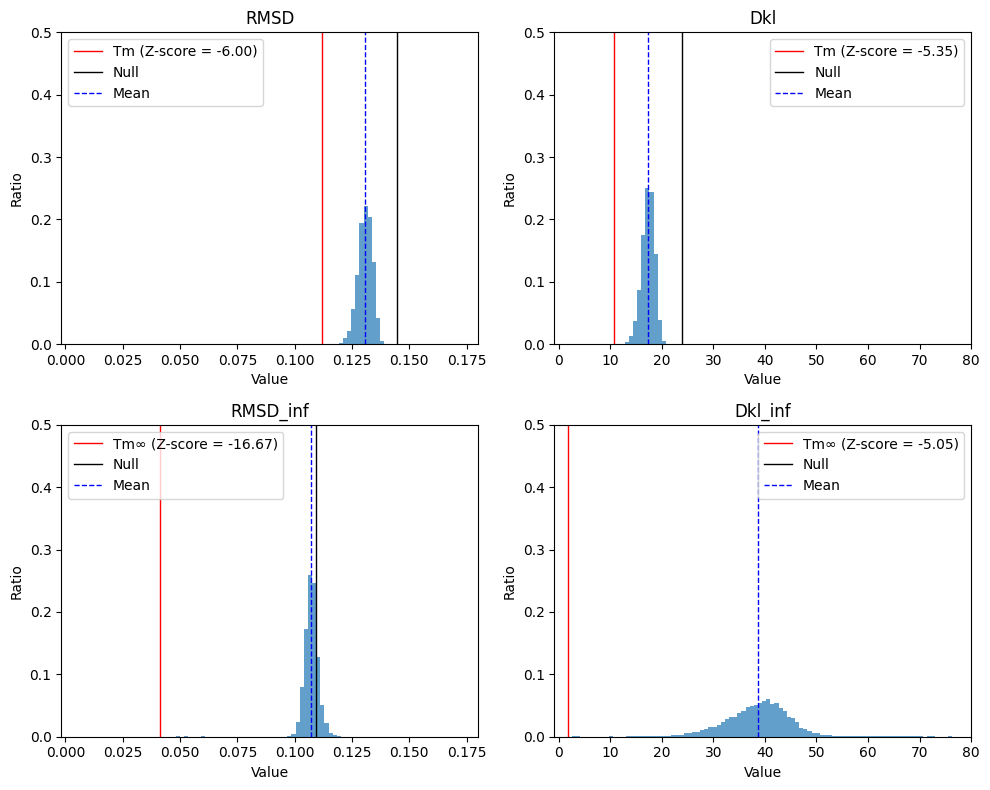

In [9]:
import matplotlib.pyplot as plt

randoms = [np.array(rmsd),
           np.array(dkl),
           np.array(rmsd_inf),
           np.array(dkl_inf)]

sds = [get_rms_diff(T, Tm_prime),
              get_dkl(T, Tm_prime),
              get_rms_diff(T_inf, Tm_inf_prime),
              get_dkl(T_inf, Tm_inf_prime)]

nulls = [get_rms_diff(T, T0_prime),
         get_dkl(T, T0_prime),
         get_rms_diff(T_inf, T0_inf_prime),
         get_dkl(T_inf, T0_inf_prime)]

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

xmax_rmsd = 0.18
xmax_dkl = 80

# Loop over each dataset and corresponding reference value
for i, (ran, sd, null) in enumerate(zip(randoms, sds, nulls)):
    row, col = divmod(i, 2)  # Determine subplot position
    ax = axs[row, col]

    # Calculate the mean and standard deviation
    mean = np.mean(ran)
    std_dev = np.std(ran)

    # Calculate the Z-score of the reference number
    z_score = (sd - mean) / std_dev


    binwidth = xmax_rmsd/100
    if i == 1 or i == 3:
        binwidth = xmax_dkl/100

    # Create the histogram
    hist, bins = np.histogram(ran, bins=np.arange(min(ran), max(ran) + binwidth, binwidth))    

    # Calculate the ratio
    ratio = hist / hist.sum()

    if i == 2 or i == 3:
        inf = "∞"
    else:
        inf = ""

    # Plot histogram and reference line
    ax.bar(bins[:-1], ratio, width=np.diff(bins), align='edge', alpha=0.7)
    ax.axvline(sd, color='red', linestyle='-', linewidth=1, label=f'Tm{inf} (Z-score = {z_score:.2f})')
    ax.axvline(null, color='black', linestyle='-', linewidth=1, label='Null')
    # Adding lines for mean
    ax.axvline(mean, color='blue', linestyle='--', linewidth=1, label='Mean')

    # Set the labels, limits, and legend for each subplot
    ax.set_xlabel('Value')
    ax.set_ylabel('Ratio')
    ax.set_ylim(0, 0.5)
    ax.legend()

axs[0,0].set_title("RMSD")
axs[0,1].set_title("Dkl")
axs[1,0].set_title("RMSD_inf")
axs[1,1].set_title("Dkl_inf")

axs[0,0].set_xlim(-xmax_rmsd/100, xmax_rmsd)
axs[0,1].set_xlim(-xmax_dkl/100, xmax_dkl)
axs[1,0].set_xlim(-xmax_rmsd/100, xmax_rmsd)
axs[1,1].set_xlim(-xmax_dkl/100, xmax_dkl)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

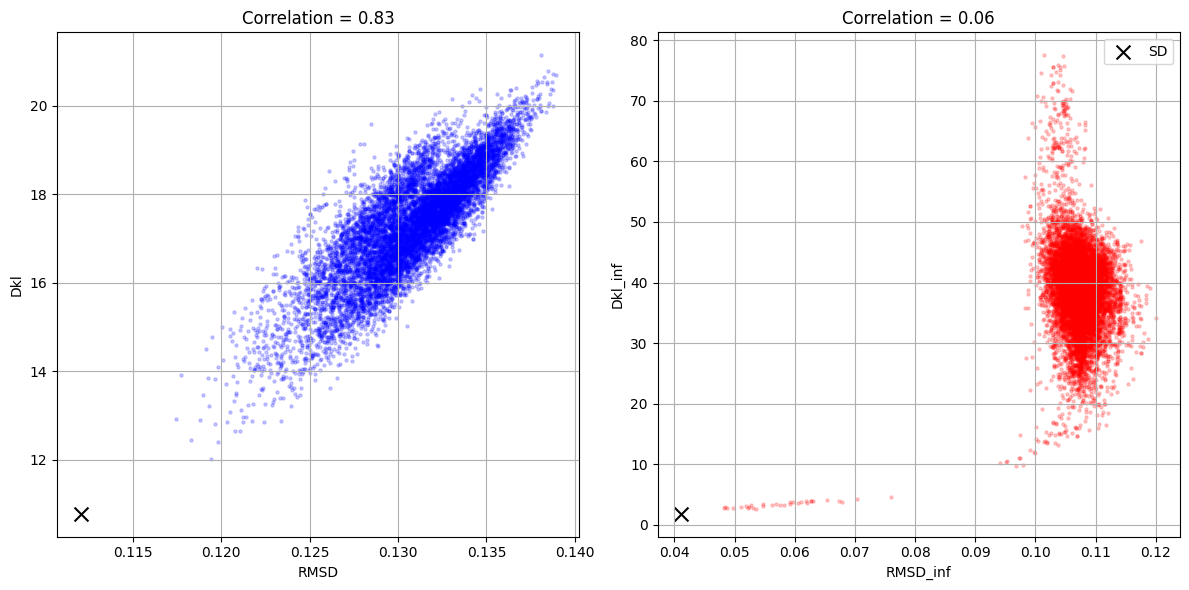

In [10]:
# Calculate the correlation coefficients for both pairs
correlation1 = np.corrcoef(rmsd, dkl)[0, 1]
correlation2 = np.corrcoef(rmsd_inf, dkl_inf)[0, 1]


# Reference points (these are the additional dots with different markers)
ref_x1, ref_y1 = sds[0], sds[1]  # Reference point for Pair 1
ref_x2, ref_y2 = sds[2], sds[3]  # Reference point for Pair 2

# Create the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot (Pair 1)
axes[0].scatter(rmsd, dkl, color='blue', alpha=0.2, s=5)
axes[0].scatter(ref_x1, ref_y1, color='black', s=100, marker='x', label=f'SD')  # Reference point with a star
axes[0].set_title(f'Correlation = {correlation1:.2f}')
axes[0].set_xlabel('RMSD')
axes[0].set_ylabel('Dkl')
axes[0].grid(True)

# Second subplot (Pair 2)
axes[1].scatter(rmsd_inf, dkl_inf, color='red', alpha=0.2, s=5)
axes[1].scatter(ref_x2, ref_y2, color='black', s=100, marker='x', label=f'SD')  # Reference point with a triangle
axes[1].set_title(f'Correlation = {correlation2:.2f}')
axes[1].set_xlabel('RMSD_inf')
axes[1].set_ylabel('Dkl_inf')
axes[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.legend()
plt.show()